**` Second: Risk Parity`**

Install the required packages

In [ ]:
!pip install yfinance
!pip install matplotlib

Import all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import minimize


Declare the companies we want to compare, the start date and the end date of comparisons

In [ ]:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
start_date = '2005-01-01'  # or at least 2010
end_date = '2025-01-01'

Downlaod the stock data from Yahoo Finance using yfinance library.
Close prices are the closing price of the stocks of companies on that particular date.

In [ ]:
# Download data (auto_adjust is now True by default)
data = yf.download(tickers, start=start_date, end=end_date)

# Extract just the Close prices
close_prices = data['Close']

# Drop any rows with missing values
close_prices = close_prices.dropna()


/tmp/ipython-input-4-4077704082.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed


Lets get the daily returns on the closing prices of the stocks.

---


Returns= (CP of current day - CP of last day) / CP of last day

In [ ]:
returns = close_prices.pct_change().dropna()

<Axes: xlabel='Ticker', ylabel='Ticker'>

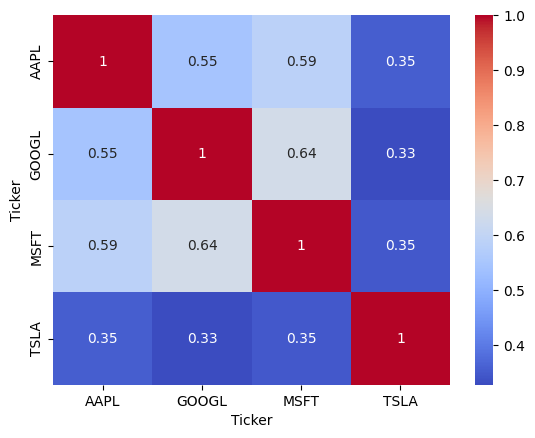

In [ ]:
import seaborn as sns
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')


In [ ]:
# daily volatility
daily_vol = returns.std()
annual_vol = daily_vol * np.sqrt(252)
inv_vol = 1 / annual_vol
weights = inv_vol / inv_vol.sum()

In [ ]:
print("Risk Parity Weights:")
for ticker, weight in zip(tickers, weights):
    print(f"{ticker}: {weight:.2%}")

Risk Parity Weights:
AAPL: 27.93%
GOOGL: 28.34%
MSFT: 30.23%
TSLA: 13.50%


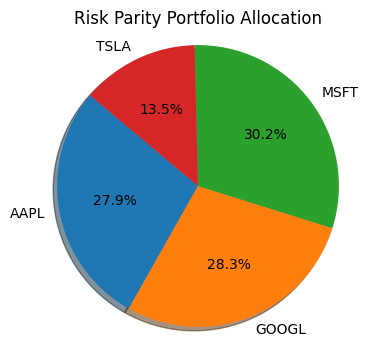

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(weights, labels=tickers, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Risk Parity Portfolio Allocation")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

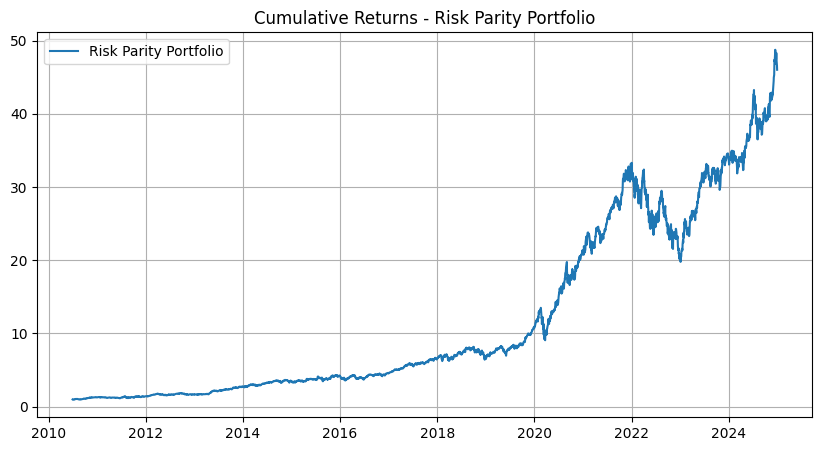

In [ ]:
risk_parity_returns = (returns * weights).sum(axis=1)
cumulative = (1 + risk_parity_returns).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(cumulative, label='Risk Parity Portfolio')
plt.title('Cumulative Returns - Risk Parity Portfolio')
plt.legend()
plt.grid(True)
plt.show()